In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
%matplotlib inline

In [3]:
ls

blouse_triplets.txt            README.md
dataCheck.ipynb                retrieval.ipynb
img/                           street2shop_tripletNet.ipynb
list_bbox_consumer2shop.txt    street2shop.zip
make_street2shopTriplet.ipynb  VGG_tripletNet.ipynb
readme_imgs/


In [11]:
idPATH = 'img/CLOTHING/T_Shirt/'

In [12]:
files = sorted([f for f in os.listdir(idPATH)]) #sorted by id
files[:5]

['id_00004844', 'id_00004845', 'id_00004866', 'id_00004879', 'id_00004893']

In [13]:
items = sorted([i for i in os.listdir(idPATH+files[2])])
items

['comsumer_01.jpg',
 'comsumer_02.jpg',
 'comsumer_03.jpg',
 'comsumer_04.jpg',
 'comsumer_05.jpg',
 'comsumer_06.jpg',
 'comsumer_07.jpg',
 'comsumer_08.jpg',
 'shop_01.jpg',
 'shop_02.jpg',
 'shop_03.jpg']

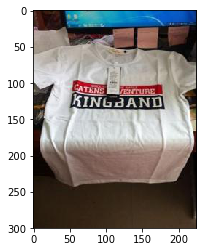

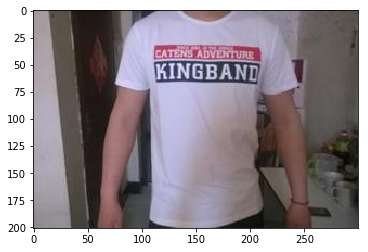

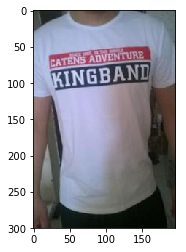

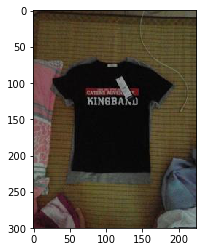

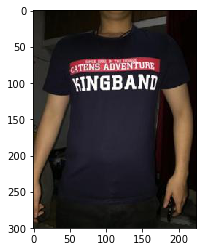

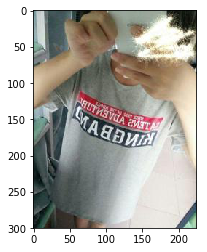

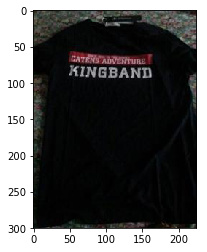

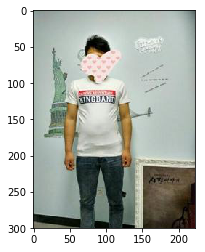

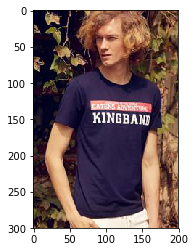

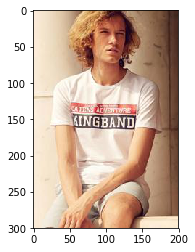

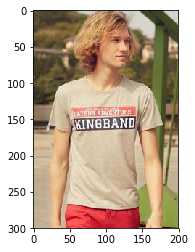

In [14]:
for i in range(len(items)):
    img = np.array(Image.open(idPATH+files[2]+'/'+items[i]))
    plt.imshow(img)
    plt.show()

###  read bounding box
Need to remove return key while reading

In [15]:
with open('list_bbox_consumer2shop.txt','r') as f:
    texts = f.readlines()
    for i,text in enumerate(texts):
        texts[i] = text.strip()

In [16]:
texts[1:10]

['image_name clothes_type source_type x_1 y_1 x_2 y_2',
 'img/CLOTHING/Polo_Shirt/id_00006282/shop_01.jpg              1 1 001 039 200 292',
 'img/CLOTHING/Polo_Shirt/id_00006282/comsumer_01.jpg          1 2 001 001 223 300',
 'img/CLOTHING/Polo_Shirt/id_00006282/comsumer_02.jpg          1 2 001 001 169 230',
 'img/CLOTHING/Polo_Shirt/id_00006282/comsumer_03.jpg          1 2 006 008 215 300',
 'img/CLOTHING/Polo_Shirt/id_00006282/comsumer_04.jpg          1 2 001 001 225 300',
 'img/CLOTHING/Polo_Shirt/id_00006695/comsumer_01.jpg          1 2 037 066 164 211',
 'img/CLOTHING/Polo_Shirt/id_00006695/comsumer_02.jpg          1 2 064 056 158 181',
 'img/CLOTHING/Polo_Shirt/id_00006695/shop_01.jpg              1 1 010 060 178 259']

### Meaning of columns
- image_name： file name
- clothes_type: clothes category
- source_type: 1 = shop image, 2 = consumer image
- x_1 y_1 x_2 y_2: four corners of bounding box

In [17]:
# extract strings example
item_num = 80000
example = [x for x in texts[i].split(' ') if len(x) > 0]
print(example)

['img/DRESSES/Dress/id_00026719/comsumer_02.jpg', '3', '2', '083', '001', '197', '162']


In [18]:
x1,y1,x2,y2=int(example[3]),int(example[4]),int(example[5]),int(example[6])

In [19]:
img_path = example[0]

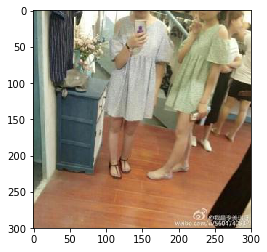

In [20]:
img = np.array(Image.open(img_path))
plt.imshow(img)
plt.show()

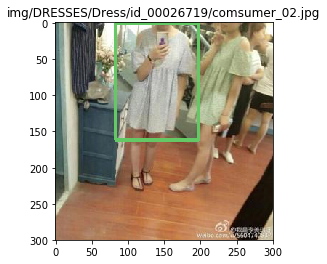

In [21]:
imgcv2 = cv2.rectangle(img, (x1,y1), (x2,y2),(100,200,100),3)
plt.imshow(imgcv2)
plt.title(img_path)
plt.show()

## make 'T_Shirt' dataset for test
first extract tshirts_list from 'list_bbox_consumer2shop.txt'

In [28]:
tshirts_list=[]
for i in range(160000):
    parse = [x for x in texts[i].split(' ') if len(x) > 0]
    if parse[0].count('T_Shirt') > 0: 
        tshirts_list.append(parse)
print('Data Length: {}'.format(len(tshirts_list)))
tshirts_list[0:3]

Data Length: 40115


[['img/TOPS/T_Shirt/id_00000001/shop_01.jpg',
  '1',
  '1',
  '016',
  '006',
  '196',
  '287'],
 ['img/TOPS/T_Shirt/id_00000001/shop_02.jpg',
  '1',
  '1',
  '028',
  '001',
  '200',
  '290'],
 ['img/TOPS/T_Shirt/id_00000001/shop_03.jpg',
  '1',
  '1',
  '042',
  '001',
  '186',
  '266']]

### crop the target item area

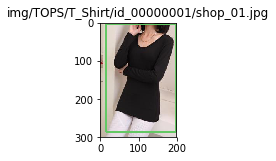

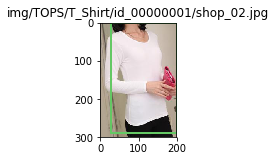

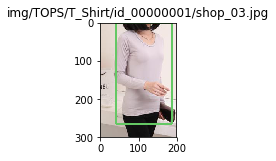

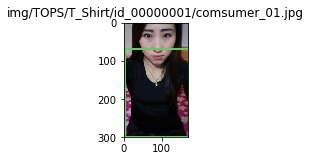

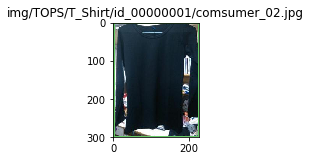

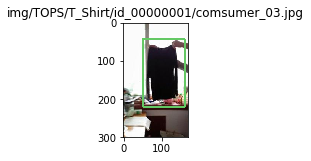

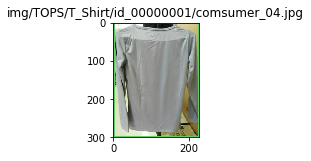

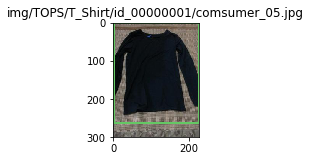

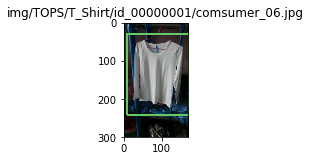

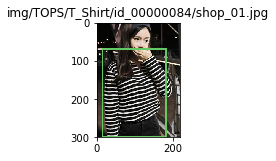

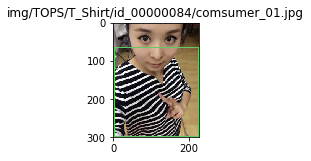

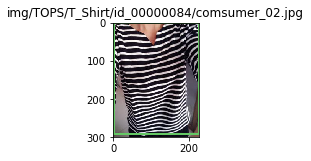

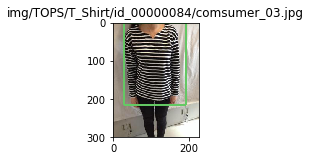

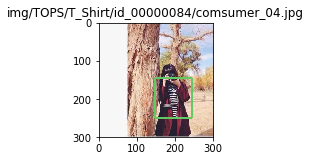

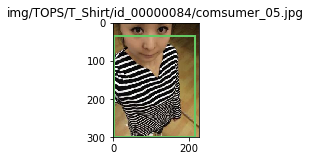

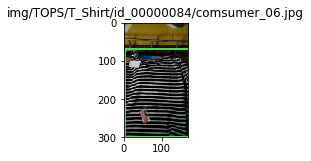

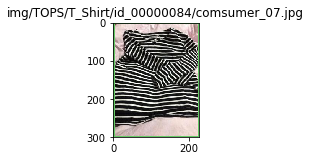

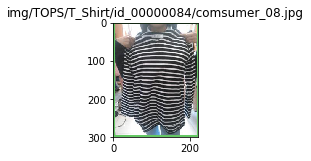

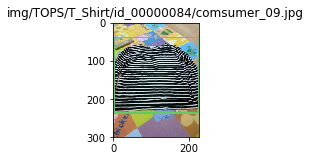

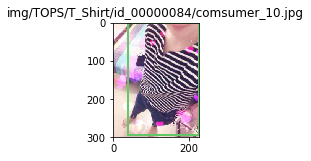

In [30]:
for i,b in enumerate(tshirts_list[:20]):
#     print(b)
    x1,y1,x2,y2=int(b[3]),int(b[4]),int(b[5]),int(b[6])
    img_path = b[0]
    img = np.array(Image.open(img_path))
    imgcv2 = cv2.rectangle(img, (x1,y1), (x2,y2),(100,200,100),3)
#     print(type(imgcv2))
    plt.figure(figsize=(50,50))
    plt.subplot(len(tshirts_list[:20]),1,i+1)
    plt.imshow(imgcv2)
    plt.title(img_path)
    plt.show()
#     plt.close('all')

### save as file
if there is no directory for a item(one id), make a directory for it.

In [31]:
# operation test
for i,b in enumerate(tshirts_list):
    x1,y1,x2,y2=int(b[3]),int(b[4]),int(b[5]),int(b[6])
    img_path = b[0]
    dir_name = img_path.split('/')
    current = './crop_img'
    
    # TOP Layer(img)
    h0 = current+'/'+dir_name[0]
    if dir_name[0] not in os.listdir(current):
        os.mkdir(h0)
    # 2nd Layer(large category)
    h1 = h0+'/'+dir_name[1]
    if dir_name[1] not in os.listdir(h0):
        os.mkdir(h1)
    # 3rd Layer(small category)
    h2 = h1+'/'+dir_name[2]
    if dir_name[2] not in os.listdir(h1):
        os.mkdir(h2)
    # 4th Layer(id)
    h3 = h2+'/'+dir_name[3]
    if dir_name[3] not in os.listdir(h2):
        os.mkdir(h3)
    
    # cropping
    cropped_img = Image.open(img_path).crop((x1,y1,x2,y2))
    cropped_img.save(current+'/'+img_path)

In [32]:
len(os.listdir('./crop_img/'))

1

In [33]:
tshirts_list[:10]

[['img/TOPS/T_Shirt/id_00000001/shop_01.jpg',
  '1',
  '1',
  '016',
  '006',
  '196',
  '287'],
 ['img/TOPS/T_Shirt/id_00000001/shop_02.jpg',
  '1',
  '1',
  '028',
  '001',
  '200',
  '290'],
 ['img/TOPS/T_Shirt/id_00000001/shop_03.jpg',
  '1',
  '1',
  '042',
  '001',
  '186',
  '266'],
 ['img/TOPS/T_Shirt/id_00000001/comsumer_01.jpg',
  '1',
  '2',
  '001',
  '071',
  '169',
  '300'],
 ['img/TOPS/T_Shirt/id_00000001/comsumer_02.jpg',
  '1',
  '2',
  '001',
  '001',
  '225',
  '300'],
 ['img/TOPS/T_Shirt/id_00000001/comsumer_03.jpg',
  '1',
  '2',
  '052',
  '044',
  '161',
  '221'],
 ['img/TOPS/T_Shirt/id_00000001/comsumer_04.jpg',
  '1',
  '2',
  '001',
  '001',
  '225',
  '300'],
 ['img/TOPS/T_Shirt/id_00000001/comsumer_05.jpg',
  '1',
  '2',
  '001',
  '001',
  '225',
  '264'],
 ['img/TOPS/T_Shirt/id_00000001/comsumer_06.jpg',
  '1',
  '2',
  '008',
  '030',
  '168',
  '241'],
 ['img/TOPS/T_Shirt/id_00000084/shop_01.jpg',
  '1',
  '1',
  '014',
  '069',
  '181',
  '300']]